In [ ]:

#just slightly modified https://github.com/BastianF/Hourly-historical-Google-Trends-Data/blob/master/Hourly%20historical%20Google%20Trends%20Data.ipynb
!pip install  pytrends

In [29]:
import datetime
from pytrends.request import TrendReq # pip install pytrends - Written for both Python 2.7+ and Python 3.3+
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [30]:

"""Specify start and end date as well es the requiered keyword for your query"""
start_date = datetime.date(2017, 1, 1)
end_date = datetime.date(2023, 6, 1)
keyword_list = ['ak 47 asiimov',
 'cs 3 ago weapon case',
 'operation bravo case',
 'awp hyper beast',
 'danger zone case',
 'chroma case',
 'operational breakout case',
 'operation hydra case',
 'sticker capsule',
 'm4a4 desolate space',
 'horizoncase',
 'chroma 3 case',
 'glove case',
 'spectrum case',
 'awp pit viper',
 'nightmares case',
 'gamma case',
 'revolver case']

In [31]:


"""Since we want weekly data for our query, we will create lists which include 
the weekly start and end date in the specified timeframe - 2018.01.01 to 2019.5.01"""

weekly_date_list = []

#Adds the start date as first entry in our weekly_date_list
start_date_temp = start_date
weekly_date_list.append(start_date_temp)

#This will return in list of weekly datetime.date objects - except the end date
while start_date_temp+datetime.timedelta(days=7) <= end_date:
    start_date_temp += datetime.timedelta(days=7)
    weekly_date_list.append(start_date_temp)

#This will add the end date to the weekly_date list. We now have a complete list in the specified timeframe
if start_date_temp+datetime.timedelta(days=7) > end_date:
    weekly_date_list.append(end_date)



In [32]:
import time
"""Now we can start to downloading the data via Google Trends API
therefore we have to specify a key which includes the start date
and the end-date with T00 as string for hourly data request"""

#This List will contain pandas Dataframes of weekly data with the features "date",
#"keyword"(which contains weekly scaling bettwen 0 and 100), "isPartial".
#Up to this point, the scaling is not correct.
interest_list = []

#Here we download the data and print the current status of the process
for i in range(len(weekly_date_list)-1):
    if i % 3  == 0:
        time.sleep(10)
    key =str(weekly_date_list[i])+"T00 "+str(weekly_date_list[i+1])+"T00"
    p = TrendReq()
    p.build_payload(kw_list=keyword_list, timeframe=key)
    interest=p.interest_over_time()
    interest_list.append(interest)
    print("GoogleTrends Call {} of {} : Timeframe: {} "\
          .format(i+1, len(weekly_date_list)-1, key )
          )    

ResponseError: The request failed: Google returned a response with code 400

In [12]:
"""Now we have to rescale our weekly data. We can do this
by overlapping the weekly timeframes by one data point."""

#We define a ratio list, which includes the correction parameters =
#(scaling last hour of week i / scaling first hour of week i+1)
ratio_list = []

#here we apply the correction parameter to all dfs in the interest list except interest_list[0]
for i in range(len(interest_list)-1):
    #Calculation of the ratio
    for keyword in keyword_list:
        print(float(interest_list[i][keyword].iloc[-1]), "   " , float(interest_list[i+1][keyword].iloc[0]))
        try:
            ratio = float(interest_list[i][keyword].iloc[-1])/float(interest_list[i+1][keyword].iloc[0]) 
        except:
            ratio = 1.0
        ratio_list.append(ratio)
        print("{} of {}: Ratio = {}, Scale 1st hour of week {} = {}, scale last hour of week {} = {}"\
              .format(i+1, len(interest_list)-1, ratio_list[i],
                      i+1, float(interest_list[i+1][keyword_list[0]].iloc[0]),
                      i ,float(interest_list[i][keyword_list[0]].iloc[-1]),
                      )
              )
        #Multiply the ratio with the scales of week i+1
        #Therefore we add the column "Scale" and multiply times the value in ratio_list[i]
        #The make the calculations work for round i+1, we overwrite the values column of the df[keyword] with df["Scale"] in the interest list
        interest_list[0]["Scale_{}".format(keyword)] = interest_list[0][keyword]
        interest_list[i+1]["Scale_{}".format(keyword)] = interest_list[i+1][keyword].apply(lambda x:x*ratio_list[i])
        interest_list[i+1][keyword] = interest_list[i+1]["Scale_{}".format(keyword)]

In [ ]:
interest_list

[                     cs go clutch case  gamma case  isPartial
 date                                                         
 2022-01-01 00:00:00                  0           0      False
 2022-01-01 01:00:00                  0           0      False
 2022-01-01 02:00:00                  0          27      False
 2022-01-01 03:00:00                  0           0      False
 2022-01-01 04:00:00                  0           0      False
 ...                                ...         ...        ...
 2022-01-07 20:00:00                 24           0      False
 2022-01-07 21:00:00                  0           0      False
 2022-01-07 22:00:00                  0           0      False
 2022-01-07 23:00:00                  0           0      False
 2022-01-08 00:00:00                 39          39      False
 
 [169 rows x 3 columns],
                      cs go clutch case  gamma case  isPartial
 date                                                         
 2022-01-08 00:00:00        

In [ ]:
interest_list

[Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Ind

In [13]:


"""We now combine the dataframes in the interest list to a Pandas Dataframe.
The data has the correct scaling now. But not yet in the range of 0 and 100."""
df = pd.concat(interest_list)
df.drop(labels = keyword_list[0] , axis = 1, inplace = True)
df.drop(labels = "isPartial", axis = 1, inplace = True)
df.head(5)



gamma case  Scale_cs go clutch case  Scale_gamma case
date                                                                      
2022-01-01 00:00:00         0.0                      0.0               0.0
2022-01-01 01:00:00         0.0                      0.0               0.0
2022-01-01 02:00:00        27.0                      0.0              27.0
2022-01-01 03:00:00         0.0                      0.0               0.0
2022-01-01 04:00:00         0.0                      0.0               0.0

In [15]:
"""As last step we scale the data back like google to a range between 0 and 100."""
for keyword in keyword_list:
    max_interest = np.max(df["Scale_{}".format(keyword)])
    df["Scale_{}".format(keyword)]=df["Scale_{}".format(keyword)]/max_interest*100


In [16]:
df

gamma case  Scale_cs go clutch case  Scale_gamma case
date                                                                      
2022-01-01 00:00:00         0.0                      0.0          0.000000
2022-01-01 01:00:00         0.0                      0.0          0.000000
2022-01-01 02:00:00        27.0                      0.0         14.307692
2022-01-01 03:00:00         0.0                      0.0          0.000000
2022-01-01 04:00:00         0.0                      0.0          0.000000
...                         ...                      ...               ...
2023-02-28 20:00:00         0.0                      0.0          0.000000
2023-02-28 21:00:00         0.0                      0.0          0.000000
2023-02-28 22:00:00         0.0                      0.0          0.000000
2023-02-28 23:00:00         0.0                      0.0          0.000000
2023-03-01 00:00:00         0.0                     17.5          0.000000

[10237 rows x 3 columns]

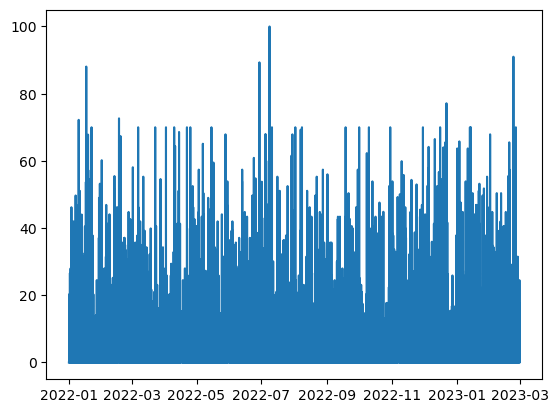

In [18]:
plt.plot(df['Scale_cs go clutch case'])

In [44]:
df.to_csv('cs_go_cluch case_trends.csv')